In [1]:
#connects colab to drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#importing nessecary libraries
import librosa
import librosa.display
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import *
from scipy.signal import kaiserord, lfilter, firwin, freqz, spectrogram

freq_cqt = librosa.cqt_frequencies(90, fmin=32)

In [0]:
#defining the class 
#each object of this class is an audio clip that is to be analysed
class Audio:
  def __init__(self, path, sr=None, duration = None):
    
    self.x, self.sr1 = librosa.load(path= path, sr=sr,duration=duration)
    
    nyq_rate = self.sr1 / 2.0
    width = 5.0/nyq_rate
    N, beta = kaiserord(60.0, width)
    taps = firwin(N, [i/nyq_rate for i in [110.0, 500.0]], window=('kaiser', beta),pass_zero=False)
    
    self.x = lfilter(taps, 1.0, self.x)
    self.time = librosa.samples_to_time(np.arange(0,len(librosa.frames_to_time(self.x,sr=self.sr1)),512))/2
    
    self.spectrogram()
    self.pitch_contour()

  def spectrogram(self,plot = False):
    cqt = librosa.cqt(self.x,sr=self.sr1)
    self.logC = librosa.amplitude_to_db(np.abs(cqt),ref = np.max)
    if plot:
      librosa.display.specshow(self.logC, sr=self.sr1, x_axis='time',y_axis = 'cqt_hz')
  """
  def spectrogram(self,plot = False):
    stft = librosa.stft(self.x)
    S, phase = librosa.magphase(stft)
    self.logC = librosa.amplitude_to_db(S,ref = np.max)
    if plot:
      librosa.display.specshow(self.logC, sr=self.sr1, x_axis='time',y_axis = 'log')
  """
  def low_pass_digital(self,S, dt = 70, ts = 50): #parameters have to be verified
    low = []
    alpha = dt/(int(dt)+ts)
    low.append((1-alpha)*S[0])
    for i in range(1,len(S)):
      g = (1-alpha)*S[i] + alpha*low[i-1]
      low.append(g)
    return low
  def pitch_contour(self):
    pitch = []
    i,j = self.logC.shape
    step = np.ones(j)
    for k in range(0,j):
      temp = np.where(self.logC[:,k]==np.amax(self.logC[:,k]))
      pitch.append(temp[0][0])
      if np.amax(self.logC[:,k]) < -15:  
        step[k] = np.nan
    pitch = [ freq_cqt[i] for i in pitch]
    pitch = self.low_pass_digital(pitch)
    self.pitch = [a*b for a,b in zip(pitch,step)]


In [0]:
test = Audio('/content/drive/My Drive/Projects/AA/Music dataset/223578__gopalkoduri__carnatic-varnam-by-dharini-in-abhogi-raaga.mp3')

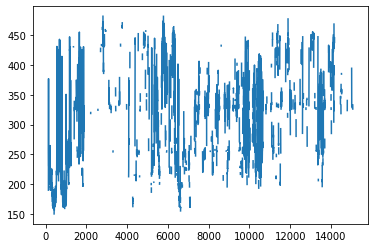

In [11]:
plt.plot(test.pitch)

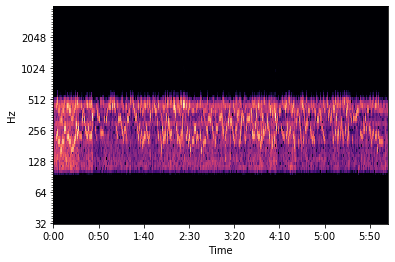

In [6]:
test.spectrogram(plot=True)

In [0]:
surabhi = Audio('/content/drive/My Drive/Projects/AA/Music dataset/Raga_Surabhi_3.wav')

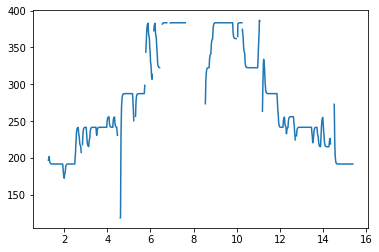

In [147]:
plt.plot(surabhi.time,surabhi.pitch)

In [0]:
n=[]
for i in surabhi.pitch:
  n.append((12*np.log2(i/191.78)))
diff_n = np.diff(n)
k=[]
for i in range(len(diff_n)):
  if(diff_n[i]<0.01 and diff_n[i]>-0.1):
    k.append((n[i],i))
k = np.array(k)
d,h = k.T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

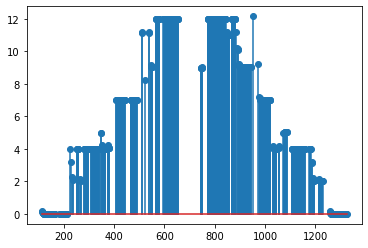

In [118]:
#plt.stem(h,d,use_line_collection = True,markerfmt = None,linefmt = '-')
plt.stem(h,d)

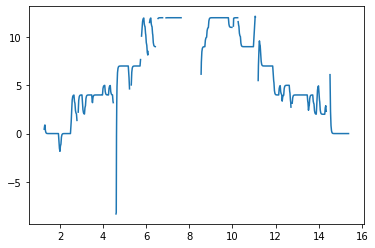

In [149]:
 plt.plot(surabhi.time,n)

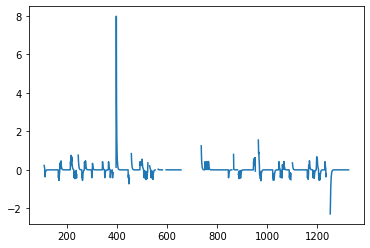

In [119]:
plt.plot(diff_n)

In [152]:
print([np.round(100*i) for i in surabhi.time])

[0.0, 1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 178.0, 179.0, 180.0, 18

In [0]:
#pitch histogram
listof_freqs=[]
# temp=a.pitch[np.logical_not(np.isnan(a.pitch))]
temp=[]
for i in ab.pitch:
   if(np.isnan(i)):
     continue
  #  i=math.ceil(i) 
   temp.append(i) 
 # i=math.ceil(i)
# print(temp)
listof_freqs.append(temp)

print(listof_freqs)

In [0]:
plt.hist(temp, bins = 100)
plt.show()
plt.style.use('ggplot')
